# Dependencies

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

from datacollect import SimData, MirexData, get_layer_from_height, get_height_from_layer, get_widman_rel

# Config

In [2]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
cm = 1 / 2.54

# Input parameters

In [3]:
# Dataset
year = 2018

# Input Dir (Simulations)
path_simulation = f'/Users/kristianboerger/working_files/ledsa/simulation/2018/'
# Input Dir (MIREX)
path_mirex = '/Users/kristianboerger/working_files/ledsa/MIREX'

# Experimental Data

experiment = 'V004' # relevant for MIREX data
simulation_1 = 'V004' # relevant for simulation data
simulation_2 = 'V004_without_lowvalues' # relevant for simulation data

# Output Path
# path_output = '/home/kboerger/ledsa/analysis/plots'

# Get data

In [4]:
path_sim1 = os.path.join(path_simulation, simulation_1, 'Cam_01')
path_sim2 = os.path.join(path_simulation, simulation_2, 'Cam_01')
mirex_file = os.path.join(path_mirex, f'{year}_{experiment}.dat')

sim_1 = SimData(path_sim1)
sim_2 = SimData(path_sim2)
mirex_data = MirexData(mirex_file)

 # Extinction coefficients with (1) vs without low values (2)

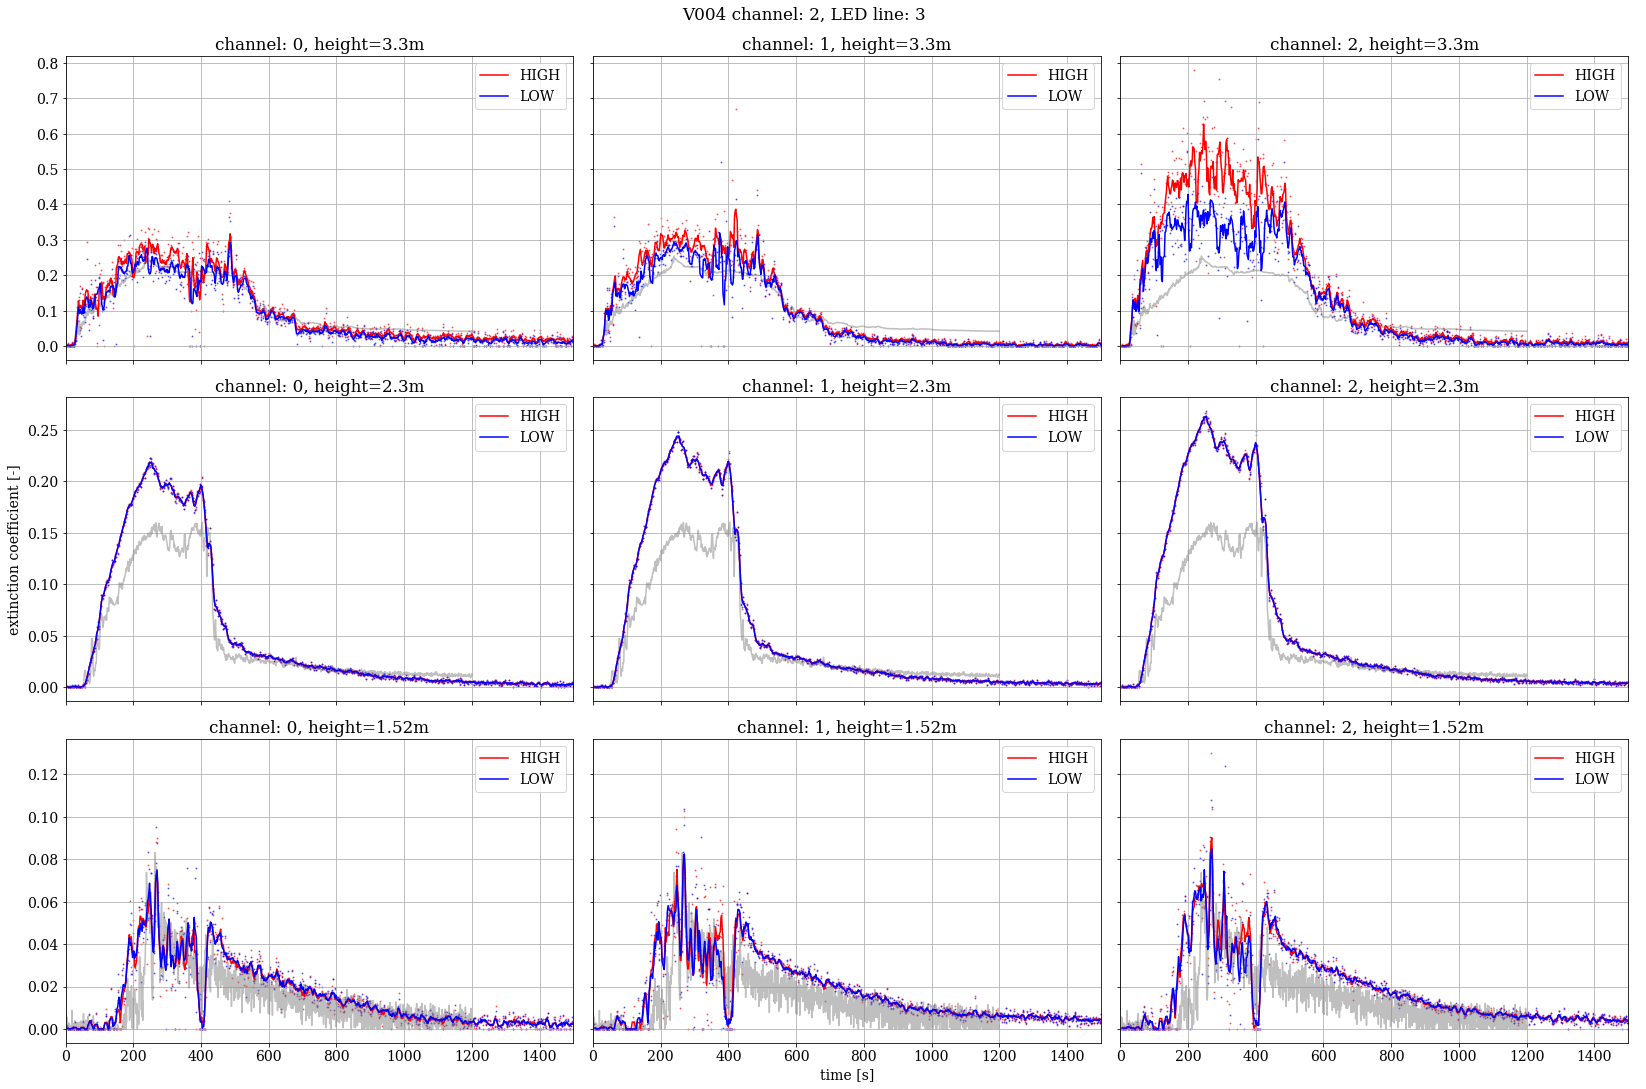

In [9]:
line = 3 # LED line
window_sim = 5 # Average window
channel_list = [0,1,2] # Camera channel to analyse
height_list = [3.3,2.3,1.52]  # Heights to analyse

# mirex_data.smooth_data(5)
mirex_list = [mirex_data.mirex_1, mirex_data.mirex_2, mirex_data.mirex_3]

min_time = 0 # Minimum datapoint
max_time = 1500 # Maximum datapoint

n_rows = len(height_list)
n_cols = len(channel_list)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharex=True, sharey="row", figsize=(60 * cm, 40 * cm))
for ax, height, mirex in zip(axs, height_list, mirex_list ):
    for channel in channel_list:
        layer = get_layer_from_height(1, 3.35, height, 20)
        extco_1 = sim_1.get_extco_at_layer(channel, layer, window_sim)
        extco_1_org = sim_1.get_extco_at_layer(channel, layer, 1)
        extco_2 = sim_2.get_extco_at_layer(channel, layer, window_sim)
        extco_2_org = sim_2.get_extco_at_layer(channel, layer, 1)

        ax[channel].plot(mirex, color='gray', alpha=0.5)
        ax[channel].plot(extco_1.index, extco_1[line], color='red', label="HIGH")
        ax[channel].scatter(extco_1_org.index, extco_1_org[line], color='red', s=1, alpha=0.5)
        ax[channel].plot(extco_2[line], color='blue', label="LOW")
        ax[channel].scatter(extco_2_org.index, extco_2_org[line], color='blue', s=1, alpha=0.5)
        ax[channel].grid(True)
        ax[channel].set_xlim(min_time, max_time)
        ax[channel].set_title(f"channel: {channel}, height={height}m")
        ax[channel].legend(loc='upper right')

fig.add_subplot(111, frameon=False)
fig.suptitle(f"{experiment} channel: {channel}, LED line: {line}")
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("time [s]")
plt.ylabel("extinction coefficient [-]",labelpad=15)
plt.tight_layout()